In [16]:
!pip3 install lightgbm

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np

## Read All Data (13-18)

In [2]:
df = pd.read_csv('ohca_13_18.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.columns.to_list())

['ACT', 'ACT_OTHER', 'ACT_VITAL_ACTIVITY', 'ADM_RESULT', 'AGE', 'BYSTANDER_CPR', 'BYSTANDER_CPR_ELSE', 'CAUSE', 'CAUSE_DISEASE', 'CAUSE_DISEASE_OTHER', 'CAUSE_INTENT', 'CAUSE_MECH', 'CPC', 'CPR', 'DC_DT', 'DTH_DT', 'DTH_TM', 'ER_ADM_DT', 'ER_ADM_TM', 'ER_DC_DT', 'ER_DC_TM', 'ER_DEFIB', 'ER_DEFIB_DT', 'ER_DEFIB_TM', 'ER_EKG', 'ER_EKG_DT', 'ER_EKG_TM', 'ER_RESULT', 'FIRST_DEFIB_PLACE', 'FIRST_EKG_PLACE', 'F_ADMINCODE', 'F_AED_EKG', 'F_ARREST_DT', 'F_ARREST_TM', 'F_CALL_DT', 'F_CALL_TM', 'F_DEFIB', 'F_HAPP_ADD_CITY', 'F_HAPP_ADD_DIST', 'F_NO_DEFIB', 'F_OPEN', 'F_PREH_INS', 'H2_ADM_RESULT', 'H2_CHART', 'H2_CPC', 'H2_DC_DT', 'H2_DTH_DT', 'H2_DTH_TM', 'H2_ER_DC_DT', 'H2_ER_DC_TM', 'H2_ER_RESULT', 'H_ADD_CITY', 'H_ADD_DIST', 'H_ADMINCODE', 'H_PLACE', 'H_PLACE1', 'H_PLACE2', 'H_PLACE_FLOOR', 'H_PLACE_OTHER', 'H_PLACE_PUBLIC', 'H_SEX', 'INS', 'LAST_NORM_DT', 'LAST_NORM_TM', 'NO_CPR', 'NUM', 'OP1', 'OP1_1', 'OP1_2', 'OP1_3', 'OP1_9', 'OP1_END_DT', 'OP1_END_TM', 'OP1_PRE_MENTAL', 'OP1_PRE_MENTAL_

## Extract essential variable

In [4]:
df_new = df[['ACT','ADM_RESULT', 'AGE', 'BYSTANDER_CPR', 'CAUSE', 'CAUSE_DISEASE', 'CPC', 'CPR', 'DC_DT', 'DTH_DT', 'DTH_TM', 'ER_ADM_DT', 
   'ER_ADM_TM', 'ER_DC_DT', 'ER_DC_TM', 'ER_DEFIB', 'ER_DEFIB_DT', 'ER_DEFIB_TM', 'ER_EKG', 'ER_EKG_DT', 'ER_EKG_TM', 'ER_RESULT',
   'FIRST_DEFIB_PLACE', 'FIRST_EKG_PLACE','F_AED_EKG', 'F_ARREST_DT', 'F_ARREST_TM','F_DEFIB','F_PREH_INS','H_PLACE_PUBLIC', 'H_SEX',
   'INS', 'LAST_NORM_DT', 'LAST_NORM_TM', 'NO_CPR','PRE_ER_ARREST_DT', 'PRE_ER_ARREST_TM', 'PRE_ER_CPR', 'PRE_ER_DEFIB', 'PRE_ER_EKG', 
   'PRE_ER_ROSC','ROSC', 'STOP_CPR', 'STOP_CPR_DT', 'STOP_CPR_TM', 'WITNESS','YEAR','PHX_DM','PHX_HEART', 'PHX_HTN','PHX_RENAL'
            ,'PHX_RESPI','PHX_STROKE','PHX_DYSLIPI','F_ADMINCODE','H_ADMINCODE','P_ADMINCODE']]

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175182 entries, 0 to 175181
Data columns (total 57 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ACT                175182 non-null  int64  
 1   ADM_RESULT         22854 non-null   float64
 2   AGE                175182 non-null  float64
 3   BYSTANDER_CPR      175182 non-null  int64  
 4   CAUSE              175182 non-null  int64  
 5   CAUSE_DISEASE      129256 non-null  float64
 6   CPC                9935 non-null    float64
 7   CPR                164900 non-null  float64
 8   DC_DT              22760 non-null   float64
 9   DTH_DT             154970 non-null  float64
 10  DTH_TM             154970 non-null  float64
 11  ER_ADM_DT          175182 non-null  int64  
 12  ER_ADM_TM          175182 non-null  int64  
 13  ER_DC_DT           175182 non-null  int64  
 14  ER_DC_TM           175182 non-null  int64  
 15  ER_DEFIB           175182 non-null  int64  
 16  ER

## F_ARREST DT & TM  float to datetime

In [6]:
df_new.F_ARREST_DT

0         20130108.0
1         20130120.0
2         20130124.0
3         20130131.0
4         20130107.0
             ...    
175177    20181103.0
175178    20181225.0
175179    20181116.0
175180           NaN
175181    99999999.0
Name: F_ARREST_DT, Length: 175182, dtype: float64

In [7]:
df_new.F_ARREST_TM

0          234.0
1         2337.0
2          430.0
3         1000.0
4         1707.0
           ...  
175177    1855.0
175178     747.0
175179    1900.0
175180       NaN
175181    9999.0
Name: F_ARREST_TM, Length: 175182, dtype: float64

In [8]:
df_new.LAST_NORM_DT

0                 NaN
1                 NaN
2         2.01301e+07
3         2.01301e+07
4                 NaN
             ...     
175177            NaN
175178            NaN
175179    2.01811e+07
175180    2.01811e+07
175181    2.01811e+07
Name: LAST_NORM_DT, Length: 175182, dtype: object

In [9]:
df_new.LAST_NORM_TM

0            NaN
1            NaN
2         9999.0
3         9999.0
4            NaN
           ...  
175177       NaN
175178       NaN
175179    1700.0
175180     100.0
175181    9999.0
Name: LAST_NORM_TM, Length: 175182, dtype: float64

In [10]:
df_new['F_ARREST_TIME'] = df_new.F_ARREST_DT.fillna(0).astype(int).astype(str)+df_new.F_ARREST_TM.fillna(0).astype(int).astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_new['LAST_NORM_TIME'] = pd.to_numeric(df_new.LAST_NORM_DT,errors='coerce').fillna(0).astype(int) + pd.to_numeric(df_new.LAST_NORM_TM,errors='coerce').fillna(0).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_new['LAST_NORM_TIME'] = pd.to_datetime(df_new['LAST_NORM_TIME'], format='%Y%m%d%H%M', errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_new['F_ARREST_TIME'] = pd.to_datetime(df_new['F_ARREST_TIME'], format='%Y%m%d%H%M', errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_new['F_ARREST_TIME']

0        2013-01-08 23:04:00
1        2013-01-20 23:37:00
2        2013-01-24 04:30:00
3        2013-01-31 10:00:00
4        2013-01-07 17:07:00
                 ...        
175177   2018-11-03 18:55:00
175178   2018-12-25 07:47:00
175179   2018-11-16 19:00:00
175180                   NaT
175181                   NaT
Name: F_ARREST_TIME, Length: 175182, dtype: datetime64[ns]

In [15]:
df_new['LAST_NORM_TIME']

0                        NaT
1                        NaT
2                        NaT
3                        NaT
4                        NaT
                 ...        
175177                   NaT
175178                   NaT
175179   2018-02-08 01:06:00
175180   2018-01-02 01:09:00
175181   2019-01-01 02:01:00
Name: LAST_NORM_TIME, Length: 175182, dtype: datetime64[ns]

## ER_ADM DT & TM  int to datetime

In [16]:
df_new['ER_ADM_TIME'] = df_new.ER_ADM_DT.fillna(0).astype(str)+df_new.ER_ADM_TM.fillna(0).astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_new['ER_ADM_TIME'] = pd.to_datetime(df_new['ER_ADM_TIME'], format='%Y%m%d%H%M', errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_new['ER_ADM_TIME']

0        2013-01-08 02:44:00
1        2013-01-20 23:58:00
2        2013-01-24 05:14:00
3        2013-01-31 10:52:00
4        2013-01-07 17:19:00
                 ...        
175177   2018-11-03 20:47:00
175178   2018-12-25 08:56:00
175179   2018-11-16 19:47:00
175180   2018-11-19 22:01:00
175181   2018-11-22 14:53:00
Name: ER_ADM_TIME, Length: 175182, dtype: datetime64[ns]

## STOP_CPR DT & TM  float to datetime

In [19]:
df_new['STOP_CPR_TIME'] = df_new.STOP_CPR_DT.fillna(0).astype(int).astype(str)+df_new.STOP_CPR_TM.fillna(0).astype(int).astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_new['STOP_CPR_TIME'] = pd.to_datetime(df_new['STOP_CPR_TIME'], format='%Y%m%d%H%M', errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_new['STOP_CPR_TIME']

0                        NaT
1        2013-01-02 01:09:00
2        2013-01-24 05:18:00
3        2013-01-31 10:59:00
4        2013-01-07 17:39:00
                 ...        
175177                   NaT
175178   2018-12-25 09:15:00
175179   2018-11-16 19:55:00
175180                   NaT
175181   2018-11-22 15:05:00
Name: STOP_CPR_TIME, Length: 175182, dtype: datetime64[ns]

## Make ARREST to ED time

In [22]:
df_new['ARREST_ER_TIME'] = df_new['ER_ADM_TIME'] - df_new['F_ARREST_TIME']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_new['ARREST_ER_TIME2'] = df_new['ER_ADM_TIME'] - df_new['LAST_NORM_TIME']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Make CPR duration time

In [24]:
df_new['CPR_DURATION_TIME'] = df_new['STOP_CPR_TIME'] - df_new['ER_ADM_TIME']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Make good neurologic outcome (CPC1&2)

In [25]:
 df_new['CPC'].value_counts()

1.0    2974
2.0    2713
4.0    2483
3.0    1696
5.0      35
9.0      34
Name: CPC, dtype: int64

In [26]:
 df_new['GOOD_NEUROLOGIC_OUTCOME'] = (df_new['CPC']==1.0) | (df_new['CPC']==2.0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
 df_new['GOOD_NEUROLOGIC_OUTCOME'].value_counts()

False    169495
True       5687
Name: GOOD_NEUROLOGIC_OUTCOME, dtype: int64

## Make survival outcome

In [28]:
 df_new['SURVIVAL_OUTCOME'] = (df_new['ER_RESULT']==10) | (df_new['ADM_RESULT']==10.0)| (df_new['ADM_RESULT']==20.0)| (df_new['ADM_RESULT']==30.0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
 df_new['SURVIVAL_OUTCOME'].value_counts()

False    165247
True       9935
Name: SURVIVAL_OUTCOME, dtype: int64

In [30]:
 df_new['ADM_RESULT'].value_counts()

40.0    12589
10.0     5557
30.0     4061
41.0      348
20.0      184
31.0       94
88.0       13
99.0        8
Name: ADM_RESULT, dtype: int64

## Exclude Trauma patients

In [31]:
df_new['CAUSE'].value_counts()

1    129256
2     43190
9      2736
Name: CAUSE, dtype: int64

In [32]:
df_new = df_new[df_new['CAUSE']==1]

## Exclude Pre-hospital ROSC

In [33]:
df_new['PRE_ER_ROSC'].value_counts()

2    120315
1      8941
Name: PRE_ER_ROSC, dtype: int64

In [34]:
df_new = df_new[df_new['PRE_ER_ROSC']!=1.0]

## Exclude No CPR in ED

In [35]:
df_new['ER_CPR'] = ((df_new['CPR']!=1.0) & (df_new['CPR']!=2.0))

In [36]:
df_new = df_new[df_new['ER_CPR']==True]

## Exclude missing value & outlier

In [37]:
df_new['ARREST_ER_TIME'] = np.where(pd.notnull(df_new['ARREST_ER_TIME']) == True, df_new['ARREST_ER_TIME'], df_new['ARREST_ER_TIME2'])

In [38]:
df_new = df_new.dropna(subset=['CPR_DURATION_TIME','ARREST_ER_TIME'])

In [39]:
idx_wrong_CPR_DURATION_TIME = df_new[(df_new['CPR_DURATION_TIME'].dt.total_seconds()/60)<0].index

In [40]:
df_new = df_new.drop(idx_wrong_CPR_DURATION_TIME)

In [41]:
idx_wrong_ARREST_ER_TIME = df_new[(df_new['ARREST_ER_TIME'].dt.total_seconds()/60)<0].index

In [42]:
df_new = df_new.drop(idx_wrong_ARREST_ER_TIME)

In [43]:
idx_wrong_ARREST_ER_TIME = df_new[(df_new['ARREST_ER_TIME'].dt.total_seconds())>86400].index

In [44]:
df_new = df_new.drop(idx_wrong_ARREST_ER_TIME)

In [45]:
idx_wrong_CPR_DURATION_TIME = df_new[(df_new['CPR_DURATION_TIME'].dt.total_seconds())>86400].index

In [46]:
df_new = df_new.drop(idx_wrong_CPR_DURATION_TIME)

In [47]:
df_new

,ACT,ADM_RESULT,AGE,BYSTANDER_CPR,CAUSE,CAUSE_DISEASE,CPC,CPR,DC_DT,DTH_DT,...,F_ARREST_TIME,LAST_NORM_TIME,ER_ADM_TIME,STOP_CPR_TIME,ARREST_ER_TIME,ARREST_ER_TIME2,CPR_DURATION_TIME,GOOD_NEUROLOGIC_OUTCOME,SURVIVAL_OUTCOME,ER_CPR
9,7,NaN,61.0,2,1,1.0,NaN,3.0,NaN,20130105.0,...,2013-01-05 07:28:00,NaT,2013-01-05 07:46:00,2013-01-05 08:15:00,0 days 00:18:00,NaT,0 days 00:29:00,False,False,True
10,7,NaN,71.0,1,1,1.0,NaN,3.0,NaN,20130126.0,...,2013-01-26 03:03:00,2013-02-03 02:05:00,2013-01-26 04:09:00,2013-01-26 11:07:00,0 days 01:06:00,-8 days +02:04:00,0 days 06:58:00,False,False,True
11,7,NaN,54.0,1,1,1.0,NaN,3.0,NaN,20130129.0,...,2013-01-29 15:23:00,NaT,2013-01-29 15:44:00,2013-01-29 16:23:00,0 days 00:21:00,NaT,0 days 00:39:00,False,False,True
15,7,NaN,57.0,9,1,1.0,NaN,3.0,NaN,20130122.0,...,2013-01-22 17:15:00,NaT,2013-01-22 17:30:00,2013-01-22 17:55:00,0 days 00:15:00,NaT,0 days 00:25:00,False,False,True
17,7,NaN,61.0,9,1,1.0,NaN,3.0,NaN,20130117.0,...,2013-01-17 06:03:00,NaT,2013-01-17 06:09:00,2013-01-17 06:34:00,0 days 00:06:00,NaT,0 days 00:25:00,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175166,99,NaN,89.0,9,1,1.0,NaN,3.0,NaN,20181216.0,...,2018-12-16 03:09:00,2018-03-05 01:05:00,2018-12-16 12:02:00,2018-12-16 14:02:00,0 days 08:53:00,286 days 10:57:00,0 days 02:00:00,False,False,True
175170,8,NaN,98.0,8,1,8.0,NaN,3.0,NaN,20181203.0,...,2018-12-03 10:22:00,NaT,2018-12-03 10:45:00,2018-12-03 11:30:00,0 days 00:23:00,NaT,0 days 00:45:00,False,False,True
175171,7,NaN,77.0,9,1,1.0,NaN,3.0,NaN,NaN,...,2018-12-25 08:48:00,NaT,2018-12-25 09:39:00,2018-12-25 10:03:00,0 days 00:51:00,NaT,0 days 00:24:00,False,False,True
175175,8,NaN,65.0,8,1,1.0,NaN,3.0,NaN,20181022.0,...,2018-10-22 10:34:00,NaT,2018-10-22 11:13:00,2018-10-22 11:45:00,0 days 00:39:00,NaT,0 days 00:32:00,False,False,True


## Save Dataframe

In [48]:
df_new.columns

Index(['ACT', 'ADM_RESULT', 'AGE', 'BYSTANDER_CPR', 'CAUSE', 'CAUSE_DISEASE',
       'CPC', 'CPR', 'DC_DT', 'DTH_DT', 'DTH_TM', 'ER_ADM_DT', 'ER_ADM_TM',
       'ER_DC_DT', 'ER_DC_TM', 'ER_DEFIB', 'ER_DEFIB_DT', 'ER_DEFIB_TM',
       'ER_EKG', 'ER_EKG_DT', 'ER_EKG_TM', 'ER_RESULT', 'FIRST_DEFIB_PLACE',
       'FIRST_EKG_PLACE', 'F_AED_EKG', 'F_ARREST_DT', 'F_ARREST_TM', 'F_DEFIB',
       'F_PREH_INS', 'H_PLACE_PUBLIC', 'H_SEX', 'INS', 'LAST_NORM_DT',
       'LAST_NORM_TM', 'NO_CPR', 'PRE_ER_ARREST_DT', 'PRE_ER_ARREST_TM',
       'PRE_ER_CPR', 'PRE_ER_DEFIB', 'PRE_ER_EKG', 'PRE_ER_ROSC', 'ROSC',
       'STOP_CPR', 'STOP_CPR_DT', 'STOP_CPR_TM', 'WITNESS', 'YEAR', 'PHX_DM',
       'PHX_HEART', 'PHX_HTN', 'PHX_RENAL', 'PHX_RESPI', 'PHX_STROKE',
       'PHX_DYSLIPI', 'F_ADMINCODE', 'H_ADMINCODE', 'P_ADMINCODE',
       'F_ARREST_TIME', 'LAST_NORM_TIME', 'ER_ADM_TIME', 'STOP_CPR_TIME',
       'ARREST_ER_TIME', 'ARREST_ER_TIME2', 'CPR_DURATION_TIME',
       'GOOD_NEUROLOGIC_OUTCOME', 'SURVIVAL

In [49]:
df = df_new[['ACT','AGE', 'BYSTANDER_CPR', 'CAUSE_DISEASE',
       'ER_DEFIB', 'ER_EKG', 'FIRST_DEFIB_PLACE',
       'FIRST_EKG_PLACE', 'H_PLACE_PUBLIC', 'H_SEX',
       'PRE_ER_CPR', 'PRE_ER_DEFIB', 'PRE_ER_EKG', 
       'WITNESS', 'YEAR', 'PHX_DM',
       'PHX_HEART', 'PHX_HTN', 'PHX_RENAL', 'PHX_RESPI', 'PHX_STROKE',
       'PHX_DYSLIPI',
       'ARREST_ER_TIME', 
       'CPR_DURATION_TIME', 'GOOD_NEUROLOGIC_OUTCOME', 'SURVIVAL_OUTCOME',
       'ER_CPR']]

In [50]:
df.CPR_DURATION_TIME = df.CPR_DURATION_TIME.dt.total_seconds()

/shl_drive/shl_home/jiwoong/.local/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [51]:
df.ARREST_ER_TIME= df.ARREST_ER_TIME.dt.total_seconds()

## Make tableOne

In [52]:
from tableone import TableOne

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49669 entries, 9 to 175176
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ACT                      49669 non-null  int64  
 1   AGE                      49669 non-null  float64
 2   BYSTANDER_CPR            49669 non-null  int64  
 3   CAUSE_DISEASE            49669 non-null  float64
 4   ER_DEFIB                 49669 non-null  int64  
 5   ER_EKG                   49669 non-null  int64  
 6   FIRST_DEFIB_PLACE        49669 non-null  int64  
 7   FIRST_EKG_PLACE          49669 non-null  int64  
 8   H_PLACE_PUBLIC           49669 non-null  int64  
 9   H_SEX                    49669 non-null  int64  
 10  PRE_ER_CPR               49669 non-null  int64  
 11  PRE_ER_DEFIB             49669 non-null  int64  
 12  PRE_ER_EKG               49669 non-null  int64  
 13  WITNESS                  49669 non-null  int64  
 14  YEAR                 

In [54]:
columns = ['ACT','AGE', 'BYSTANDER_CPR', 'CAUSE_DISEASE',
       'ER_DEFIB', 'ER_EKG', 'FIRST_DEFIB_PLACE',
       'FIRST_EKG_PLACE', 'H_PLACE_PUBLIC', 'H_SEX',
       'PRE_ER_CPR', 'PRE_ER_DEFIB', 'PRE_ER_EKG', 
       'WITNESS', 'YEAR', 'PHX_DM',
       'PHX_HEART', 'PHX_HTN', 'PHX_RENAL', 'PHX_RESPI', 'PHX_STROKE',
       'PHX_DYSLIPI',
       'ARREST_ER_TIME', 
       'CPR_DURATION_TIME', 'GOOD_NEUROLOGIC_OUTCOME', 'SURVIVAL_OUTCOME',
       'ER_CPR']

In [55]:
categorical = ['ACT','BYSTANDER_CPR', 'CAUSE_DISEASE',
       'ER_DEFIB', 'ER_EKG', 'FIRST_DEFIB_PLACE',
       'FIRST_EKG_PLACE', 'H_PLACE_PUBLIC', 'H_SEX',
       'PRE_ER_CPR', 'PRE_ER_DEFIB', 'PRE_ER_EKG', 
       'WITNESS', 'YEAR', 'PHX_DM',
       'PHX_HEART', 'PHX_HTN', 'PHX_RENAL', 'PHX_RESPI', 'PHX_STROKE',
       'PHX_DYSLIPI',
       'GOOD_NEUROLOGIC_OUTCOME', 'SURVIVAL_OUTCOME',
       'ER_CPR']

In [56]:
df['train_or_test'] = df['YEAR'] == 2018

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
mytable = TableOne(df, columns=columns, categorical=categorical, pval = True, groupby='train_or_test', pval_test_name=True, smd= True)

/shl_drive/shl_home/jiwoong/.local/lib/python3.6/site-packages/tableone/tableone.py:235: DeprecationWarning: The pval_test_name argument is deprecated; use htest_name instead.
  "htest_name instead.", DeprecationWarning)


In [58]:
mytable

Grouped by train_or_test                                                                                                                       
                                                      Missing          Overall            False             True P-Value                                       Test SMD (False,True)
n                                                                        49669            39602            10067                                                                    
ACT, n (%)                     1                            0        106 (0.2)         84 (0.2)         22 (0.2)  <0.001                                Chi-squared              nan
                               2                                    1357 (2.7)       1140 (2.9)        217 (2.2)                                                                    
                               3                                    2015 (4.1)       1664 (4.2)        351 (3.5)                                                                    
                               4                                     487 (1.0)        395 (1.0)         92 (0.9)                                                                    
                               5                                      49 (0.1)         45 (0.1)          4 (0.0)                                                                    
                               6                                    1224 (2.5)        942 (2.4)        282 (2.8)                                                                    
                               7                                  25150 (50.6)     21145 (53.4)      4005 (39.8)                                                                    
                               8                                   5780 (11.6)      4500 (11.4)      1280 (12.7)                                                                    
                               88                                   1429 (2.9)       1040 (2.6)        389 (3.9)                                                                    
                               9                                     151 (0.3)        151 (0.4)                                                                                     
                               99                                 11921 (24.0)      8496 (21.5)      3425 (34.0)                                                                    
AGE, mean (SD)                                              0      67.0 (18.8)      66.5 (19.3)      68.8 (16.6)  <0.001                          Two Sample T-test            0.125
BYSTANDER_CPR, n (%)           1                            0      5645 (11.4)      4785 (12.1)        860 (8.5)  <0.001                                Chi-squared            0.333
                               2                                   9966 (20.1)      7417 (18.7)      2549 (25.3)                                                                    
                               8                                    3415 (6.9)       2142 (5.4)      1273 (12.6)                                                                    
                               9                                  30643 (61.7)     25258 (63.8)      5385 (53.5)                                                                    
CAUSE_DISEASE, n (%)           1.0                          0     45792 (92.2)     36495 (92.2)      9297 (92.4)  <0.001                                Chi-squared            0.114
                               2.0                                   381 (0.8)        303 (0.8)         78 (0.8)                                                                    
                               3.0                                   775 (1.6)        558 (1.4)        217 (2.2)                                                                    
                               4.0                     

In [120]:
mytable.cont_describe_all

Overall,count,mean,median,std,q25,q75,min,max,t1_summary
,Overall,Overall,Overall,Overall,Overall,Overall,Overall,Overall,Overall
variable,,,,,,,,,
AGE,49669,66.9605,70,18.8004,57,79,0,999,67.0 (18.8)
ARREST_ER_TIME,49669,2755.42,1800,4531.11,1320,2580,0,85740,2755.4 (4531.1)
CPR_DURATION_TIME,49669,2346.01,1620,4017.41,1020,2220,0,72600,2346.0 (4017.4)


In [60]:
mytable.cat_describe_all

Missing    freq       n    percent percent_str    t1_summary
               Overall Overall Overall    Overall     Overall       Overall
variable value                                                             
ACT      1         0.0     106   49669   0.213413         0.2     106 (0.2)
         2         NaN    1357   49669   2.732086         2.7    1357 (2.7)
         3         NaN    2015   49669   4.056856         4.1    2015 (4.1)
         4         NaN     487   49669   0.980491         1.0     487 (1.0)
         5         NaN      49   49669   0.098653         0.1      49 (0.1)
...                ...     ...     ...        ...         ...           ...
YEAR     2014      NaN    7952   49669  16.009986        16.0   7952 (16.0)
         2015      NaN    8289   49669  16.688478        16.7   8289 (16.7)
         2016      NaN    7727   49669  15.556987        15.6   7727 (15.6)
         2017      NaN    8187   49669  16.483118        16.5   8187 (16.5)
         2018      NaN   10067   49669  20.268175        20.3  10067 (20.3)

[98 rows x 6 columns]

In [61]:
print(mytable.tabulate(tablefmt="github"))

|                                |       | Missing   | Overall         | False           | True            | P-Value   | Test                                      | SMD (False,True)   |
|--------------------------------|-------|-----------|-----------------|-----------------|-----------------|-----------|-------------------------------------------|--------------------|
| n                              |       |           | 49669           | 39602           | 10067           |           |                                           |                    |
| ACT, n (%)                     | 1     | 0         | 106 (0.2)       | 84 (0.2)        | 22 (0.2)        | <0.001    | Chi-squared                               | nan                |
|                                | 2     |           | 1357 (2.7)      | 1140 (2.9)      | 217 (2.2)       |           |                                           |                    |
|                                | 3     |           | 2015 (4.1)     

In [64]:
mytable.to_excel('mytable.xlsx')

In [58]:
df.to_csv('ohca_13_18_final.csv', index = False)

## Preprocessing

In [2]:
df = pd.read_csv('ohca_13_18_final.csv')

In [3]:
df

,ACT,AGE,BYSTANDER_CPR,CAUSE_DISEASE,ER_DEFIB,ER_EKG,FIRST_DEFIB_PLACE,FIRST_EKG_PLACE,H_PLACE_PUBLIC,H_SEX,...,PHX_HTN,PHX_RENAL,PHX_RESPI,PHX_STROKE,PHX_DYSLIPI,ARREST_ER_TIME,CPR_DURATION_TIME,GOOD_NEUROLOGIC_OUTCOME,SURVIVAL_OUTCOME,ER_CPR
0,7,61.0,2,1.0,1,5,4,1,2,2,...,2,2,2,2,2,1080.0,1740.0,False,False,True
1,7,71.0,1,1.0,2,5,3,1,2,2,...,2,9,9,1,9,3960.0,25080.0,False,False,True
2,7,54.0,1,1.0,2,4,1,1,2,1,...,1,9,9,9,9,1260.0,2340.0,False,False,True
3,7,57.0,9,1.0,1,5,1,3,1,1,...,9,9,9,9,9,900.0,1500.0,False,False,True
4,7,61.0,9,1.0,1,5,9,3,2,1,...,9,9,9,9,9,360.0,1500.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49664,99,89.0,9,1.0,1,4,9,1,2,2,...,9,9,9,9,9,31980.0,7200.0,False,False,True
49665,8,98.0,8,8.0,2,5,3,3,2,2,...,9,9,9,9,9,1380.0,2700.0,False,False,True
49666,7,77.0,9,1.0,1,9,9,1,9,2,...,9,9,9,9,9,3060.0,1440.0,False,False,True
49667,8,65.0,8,1.0,1,5,9,3,2,1,...,1,9,9,9,9,2340.0,1920.0,False,False,True


In [4]:
df_new = pd.get_dummies(df, columns=['ACT','BYSTANDER_CPR', 'CAUSE_DISEASE',
       'ER_DEFIB', 'ER_EKG', 'FIRST_DEFIB_PLACE',
       'FIRST_EKG_PLACE', 'H_PLACE_PUBLIC', 'H_SEX',
       'PRE_ER_CPR', 'PRE_ER_DEFIB', 'PRE_ER_EKG', 
       'WITNESS', 'PHX_DM',
       'PHX_HEART', 'PHX_HTN', 'PHX_RENAL', 'PHX_RESPI', 'PHX_STROKE',
       'PHX_DYSLIPI'])

In [5]:
df_new

,AGE,YEAR,ARREST_ER_TIME,CPR_DURATION_TIME,GOOD_NEUROLOGIC_OUTCOME,SURVIVAL_OUTCOME,ER_CPR,ACT_1,ACT_2,ACT_3,...,PHX_RENAL_9,PHX_RESPI_1,PHX_RESPI_2,PHX_RESPI_9,PHX_STROKE_1,PHX_STROKE_2,PHX_STROKE_9,PHX_DYSLIPI_1,PHX_DYSLIPI_2,PHX_DYSLIPI_9
0,61.0,2013,1080.0,1740.0,False,False,True,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,71.0,2013,3960.0,25080.0,False,False,True,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,54.0,2013,1260.0,2340.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,57.0,2013,900.0,1500.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
4,61.0,2013,360.0,1500.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49664,89.0,2018,31980.0,7200.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
49665,98.0,2018,1380.0,2700.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
49666,77.0,2018,3060.0,1440.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
49667,65.0,2018,2340.0,1920.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [6]:
from sklearn.preprocessing import RobustScaler

In [7]:
transformer = RobustScaler().fit(df_new.ARREST_ER_TIME.values.reshape(-1,1))

In [8]:
transformer.transform(df_new.ARREST_ER_TIME.values.reshape(-1,1))

array([[-0.57142857],
       [ 1.71428571],
       [-0.42857143],
       ...,
       [ 1.        ],
       [ 0.42857143],
       [ 1.0952381 ]])

In [9]:
df_new.ARREST_ER_TIME = transformer.transform(df_new.ARREST_ER_TIME.values.reshape(-1,1))

In [10]:
transformer = RobustScaler().fit(df_new.AGE.values.reshape(-1,1))

In [11]:
transformer.transform(df_new.AGE.values.reshape(-1,1))

array([[-0.40909091],
       [ 0.04545455],
       [-0.72727273],
       ...,
       [ 0.31818182],
       [-0.22727273],
       [ 0.        ]])

In [12]:
df_new.AGE = transformer.transform(df_new.AGE.values.reshape(-1,1))

In [13]:
df2 = df_new

In [14]:
df2

,AGE,YEAR,ARREST_ER_TIME,CPR_DURATION_TIME,GOOD_NEUROLOGIC_OUTCOME,SURVIVAL_OUTCOME,ER_CPR,ACT_1,ACT_2,ACT_3,...,PHX_RENAL_9,PHX_RESPI_1,PHX_RESPI_2,PHX_RESPI_9,PHX_STROKE_1,PHX_STROKE_2,PHX_STROKE_9,PHX_DYSLIPI_1,PHX_DYSLIPI_2,PHX_DYSLIPI_9
0,-0.409091,2013,-0.571429,1740.0,False,False,True,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0.045455,2013,1.714286,25080.0,False,False,True,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,-0.727273,2013,-0.428571,2340.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,-0.590909,2013,-0.714286,1500.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
4,-0.409091,2013,-1.142857,1500.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49664,0.863636,2018,23.952381,7200.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
49665,1.272727,2018,-0.333333,2700.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
49666,0.318182,2018,1.000000,1440.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1
49667,-0.227273,2018,0.428571,1920.0,False,False,True,0,0,0,...,1,0,0,1,0,0,1,0,0,1


## Machine Learning model

In [36]:
import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import metrics    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import lightgbm as lgb
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.combine import *
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from sklearn.model_selection import cross_validate
import scipy.stats as st

In [37]:
train_df = df2[df2['YEAR'] != 2018]
test_df = df2[df2['YEAR'] == 2018]

### Conventional model

In [87]:

trX = train_df.drop(columns = ['SURVIVAL_OUTCOME','GOOD_NEUROLOGIC_OUTCOME', 'CPR_DURATION_TIME']).values
trX = np.concatenate([trX, train_df[['CPR_DURATION_TIME']].values], axis = 1)
trY = train_df['SURVIVAL_OUTCOME'].values.flatten() * 1
teX = test_df.drop(columns = ['SURVIVAL_OUTCOME','GOOD_NEUROLOGIC_OUTCOME', 'CPR_DURATION_TIME']).values
teX = np.concatenate([teX, test_df[['CPR_DURATION_TIME']].values], axis = 1)
teY = test_df['SURVIVAL_OUTCOME'].values.flatten() * 1

#X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_sample(trX, trY)

#XGBOOST
forest = lgb.LGBMClassifier(n_estimators=300, n_jobs=-1, max_depth=128, min_child_samples=60, num_leaves=64, subsample=0.8)
forest.fit(trX, trY)
y_pred_RF = forest.predict(teX)
probas_RF = forest.predict_proba(teX)[:,1]

#total=df3['SURVIVAL_OUTCOME'].count()
#surv = df3[(df3['SURVIVAL_OUTCOME']==True)]['SURVIVAL_OUTCOME'].count()
#auc_crosval = cross_val_score(estimator=forest, X=trX, y=trY, cv=5, scoring='roc_auc').mean()    
#fpr, tpr, thresholds = roc_curve(teY,probas_RF)
#auc_testset = auc(fpr, tpr)     


### recall by threshold

In [175]:
thres_0001_pred = (probas_RF >= 0.001)
thres_0002_pred = (probas_RF >= 0.002)
thres_0003_pred = (probas_RF >= 0.003)
thres_0004_pred = (probas_RF >= 0.004)
thres_0005_pred = (probas_RF >= 0.005)
thres_0006_pred = (probas_RF >= 0.006)
thres_0007_pred = (probas_RF >= 0.007)
thres_0008_pred = (probas_RF >= 0.008)
thres_0009_pred = (probas_RF >= 0.009)
#tn_001, fp_001, fn_001, tp_001 = confusion_matrix(teY, thres_001_pred).ravel()

print('roc_auc:', roc_auc_score(teY, probas_RF))

  

#print('F1 score:', f1_score(teY, y_pred_RF))
#print('Recall:', recall_score(teY, y_pred_RF))
#print('Precision:', precision_score(teY, y_pred_RF))
#print('\n clasification report:\n', classification_report(teY,y_pred_RF))
print('\n clasification report1:\n', classification_report(teY,thres_0001_pred))
print('\n clasification report2:\n', classification_report(teY,thres_0002_pred))
print('\n clasification report3:\n', classification_report(teY,thres_0003_pred))
print('\n clasification report4:\n', classification_report(teY,thres_0004_pred))
print('\n clasification report5:\n', classification_report(teY,thres_0005_pred))
print('\n clasification report6:\n', classification_report(teY,thres_0006_pred))
print('\n clasification report7:\n', classification_report(teY,thres_0007_pred))
print('\n clasification report8:\n', classification_report(teY,thres_0008_pred))
print('\n clasification report9:\n', classification_report(teY,thres_0009_pred))


#print('\n confussion matrix:\n',confusion_matrix(teY, y_pred_RF))

roc_auc: 0.8807148504175607

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.56      9577
           1       0.08      0.97      0.14       490

    accuracy                           0.42     10067
   macro avg       0.54      0.68      0.35     10067
weighted avg       0.95      0.42      0.54     10067


 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.51      0.67      9577
           1       0.09      0.96      0.17       490

    accuracy                           0.53     10067
   macro avg       0.54      0.73      0.42     10067
weighted avg       0.95      0.53      0.65     10067


 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.57      0.73      9577
           1       0.10      0.93      0.18       490

    accuracy                           0.59     10067
   macro avg       0.55  

### Conventional model predict proba by Time

In [88]:
list_mean_proba_conventional = []
list_mean_proba_conventional_with_ci = []
list_auc_score_conventional = []
list_auc_score_conventional_with_ci = []
bootstrap_sampling_n = 1000

for lower in np.arange(0, 3660, 60):
    temp_df = test_df[test_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)]
    teX = temp_df.drop(columns = ['SURVIVAL_OUTCOME','GOOD_NEUROLOGIC_OUTCOME', 'CPR_DURATION_TIME']).values
    teX = np.concatenate([teX, np.full((teX.shape[0], 1), lower)], axis = 1)
    teY = temp_df['SURVIVAL_OUTCOME'].values.flatten() * 1
    
    proba = forest.predict_proba(teX)[:,1]
    mean_proba = proba.mean()
    fpr, tpr, _ = roc_curve(teY, proba)
    auc_score = auc(fpr, tpr)
        
    list_mean_proba_conventional.append(mean_proba)
    list_auc_score_conventional.append(auc_score)
    
    auc_with_ci = []
    proba_with_ci = []
    for i in range(bootstrap_sampling_n):
        list_index = np.random.choice(proba.shape[0], proba.shape[0], replace = True)
        temp_proba = proba[list_index]
        temp_real = teY
        fpr, tpr, _ = roc_curve(teY, proba)
        auc_score = auc(fpr, tpr)
        auc_with_ci.append(auc_score)
        proba_with_ci.append(np.mean(temp_proba))
    list_mean_proba_conventional_with_ci.append(proba_with_ci)
    list_auc_score_conventional_with_ci.append(auc_with_ci)

In [89]:
df_list_mean_proba_conventional = pd.DataFrame()

In [90]:
list_mean_proba_conventional_with_ci_lower = []
list_mean_proba_conventional_with_ci_upper = []
for i in range(0,len(list_mean_proba_conventional_with_ci)):
    # 95% CI   
    list_mean_proba_conventional_with_ci_lower.append(st.t.interval(0.95, len(list_mean_proba_conventional_with_ci[i])-1, loc=np.mean(list_mean_proba_conventional_with_ci[i]), scale=st.sem(list_mean_proba_conventional_with_ci[i]))[0])
    list_mean_proba_conventional_with_ci_upper.append(st.t.interval(0.95, len(list_mean_proba_conventional_with_ci[i])-1, loc=np.mean(list_mean_proba_conventional_with_ci[i]), scale=st.sem(list_mean_proba_conventional_with_ci[i]))[1])

In [91]:
df_list_mean_proba_conventional['proba'] = list_mean_proba_conventional
df_list_mean_proba_conventional['95CI_lower'] = list_mean_proba_conventional_with_ci_lower
df_list_mean_proba_conventional['95CI_upper'] = list_mean_proba_conventional_with_ci_upper

In [92]:
df_list_mean_proba_conventional.to_csv('conventional_proba_95CI_sur.csv',index=False)

### TAMO model predict proba by Time

In [46]:
train_df = df2[df2['YEAR'] != 2018]
test_df = df2[df2['YEAR'] == 2018]

In [47]:
list_model = []
list_mean_proba_tacom = []
list_auc_score_tacom = []
list_recall_score_tacom = []
list_precision_score_tacom = []
list_auprc_score_tacom = []
list_mean_proba_tacom_with_ci = []
list_auc_score_tacom_with_ci = []
list_recall_score_tacom_with_ci = []
list_precision_score_tacom_with_ci = []
list_auprc_score_tacom_with_ci = []
bootstrap_sampling_n = 1000


for lower in np.arange(0, 3660, 60):
    print(lower)

    trX = train_df[train_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)].drop(columns = ['SURVIVAL_OUTCOME','GOOD_NEUROLOGIC_OUTCOME', 'CPR_DURATION_TIME']).values
    trY = train_df[train_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)]['GOOD_NEUROLOGIC_OUTCOME'].values.flatten() * 1
    teX = test_df[test_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)].drop(columns = ['SURVIVAL_OUTCOME','GOOD_NEUROLOGIC_OUTCOME', 'CPR_DURATION_TIME']).values
    teY = test_df[test_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)]['GOOD_NEUROLOGIC_OUTCOME'].values.flatten() * 1
    

    #X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_sample(trX, trY)

    #XGBOOST
    forest = lgb.LGBMClassifier(n_estimators=300, n_jobs=-1, max_depth=128, min_child_samples=60, num_leaves=64, subsample=0.8)
    forest.fit(trX, trY)
    
    proba = forest.predict_proba(teX)[:,1]
    mean_proba = proba.mean()
    
    thres_0001_pred = (proba >= 0.001)
    
    #precision, recall, _ = precision_recall_curve(teY, thres_0001_pred)
    fpr, tpr, _ = roc_curve(teY, proba)
    auc_score = auc(fpr, tpr)
    auprc_score = average_precision_score(teY, proba)
    
    list_mean_proba_tacom.append(mean_proba)
    list_recall_score_tacom.append(recall_score(teY, thres_0001_pred))
    list_precision_score_tacom.append(precision_score(teY, thres_0001_pred))
    list_auc_score_tacom.append(auc_score)
    list_auprc_score_tacom.append(auprc_score)
    list_model.append(forest)

    auc_with_ci = []
    recall_with_ci = []
    precision_with_ci = []
    auprc_with_ci = []
    proba_with_ci = []
    for i in range(bootstrap_sampling_n):
        list_index = np.random.choice(proba.shape[0], proba.shape[0], replace = True)
        temp_proba = proba[list_index]
        temp_real = teY[list_index]
        fpr, tpr, _ = roc_curve(temp_real, temp_proba)
        thres_0001_pred = (temp_proba >= 0.001)        
        auc_score = auc(fpr, tpr)
        auprc_score = average_precision_score(temp_real, temp_proba)
        auc_with_ci.append(auc_score)
        auprc_with_ci.append(auprc_score)
        recall_with_ci.append(recall_score(temp_real, thres_0001_pred))
        precision_with_ci.append(precision_score(temp_real, thres_0001_pred))
        proba_with_ci.append(np.mean(temp_proba))
    list_mean_proba_tacom_with_ci.append(proba_with_ci)
    list_auc_score_tacom_with_ci.append(auc_with_ci)
    list_recall_score_tacom_with_ci.append(recall_with_ci)
    list_auprc_score_tacom_with_ci.append(auprc_with_ci)
    list_precision_score_tacom_with_ci.append(precision_with_ci)

0
60
120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
1260
1320
1380
1440
1500
1560
1620
1680
1740
1800
1860
1920
1980
2040
2100
2160
2220
2280
2340
2400
2460
2520
2580
2640
2700
2760
2820
2880
2940
3000
3060
3120
3180


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3240


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3300


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3360
3420


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3480


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3540


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3600


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
df_list_mean_proba_tamo = pd.DataFrame()

In [49]:
list_auc_score_tacom_with_ci_lower = []
list_auc_score_tacom_with_ci_upper = []
for i in range(0,len(list_auc_score_tacom_with_ci)):
    # 95% CI   
    list_auc_score_tacom_with_ci_lower.append(st.t.interval(0.95, len(list_auc_score_tacom_with_ci[i])-1, loc=np.mean(list_auc_score_tacom_with_ci[i]), scale=st.sem(list_auc_score_tacom_with_ci[i]))[0])
    list_auc_score_tacom_with_ci_upper.append(st.t.interval(0.95, len(list_auc_score_tacom_with_ci[i])-1, loc=np.mean(list_auc_score_tacom_with_ci[i]), scale=st.sem(list_auc_score_tacom_with_ci[i]))[1])

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1996: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


In [50]:
list_auprc_tacom_with_ci_lower = []
list_auprc_tacom_with_ci_upper = []
for i in range(0,len(list_auprc_score_tacom_with_ci)):
    # 95% CI   
    list_auprc_tacom_with_ci_lower.append(st.t.interval(0.95, len(list_auprc_score_tacom_with_ci[i])-1, loc=np.mean(list_auprc_score_tacom_with_ci[i]), scale=st.sem(list_auprc_score_tacom_with_ci[i]))[0])
    list_auprc_tacom_with_ci_upper.append(st.t.interval(0.95, len(list_auprc_score_tacom_with_ci[i])-1, loc=np.mean(list_auprc_score_tacom_with_ci[i]), scale=st.sem(list_auprc_score_tacom_with_ci[i]))[1])

In [51]:
list_recall_score_tacom_with_ci_lower = []
list_recall_score_tacom_with_ci_upper = []
for i in range(0,len(list_recall_score_tacom_with_ci)):
    # 95% CI   
    list_recall_score_tacom_with_ci_lower.append(st.t.interval(0.95, len(list_recall_score_tacom_with_ci[i])-1, loc=np.mean(list_recall_score_tacom_with_ci[i]), scale=st.sem(list_recall_score_tacom_with_ci[i]))[0])
    list_recall_score_tacom_with_ci_upper.append(st.t.interval(0.95, len(list_recall_score_tacom_with_ci[i])-1, loc=np.mean(list_recall_score_tacom_with_ci[i]), scale=st.sem(list_recall_score_tacom_with_ci[i]))[1])

In [52]:
list_precision_score_tacom_with_ci_lower = []
list_precision_score_tacom_with_ci_upper = []
for i in range(0,len(list_precision_score_tacom_with_ci)):
    # 95% CI   
    list_precision_score_tacom_with_ci_lower.append(st.t.interval(0.95, len(list_precision_score_tacom_with_ci[i])-1, loc=np.mean(list_precision_score_tacom_with_ci[i]), scale=st.sem(list_precision_score_tacom_with_ci[i]))[0])
    list_precision_score_tacom_with_ci_upper.append(st.t.interval(0.95, len(list_precision_score_tacom_with_ci[i])-1, loc=np.mean(list_precision_score_tacom_with_ci[i]), scale=st.sem(list_precision_score_tacom_with_ci[i]))[1])

In [53]:
df_list_mean_proba_tamo['auc'] = list_auc_score_tacom
df_list_mean_proba_tamo['auc_95CI_lower'] = list_auc_score_tacom_with_ci_lower
df_list_mean_proba_tamo['auc_95CI_upper'] = list_auc_score_tacom_with_ci_upper
df_list_mean_proba_tamo['auprc'] = list_auprc_score_tacom
df_list_mean_proba_tamo['auprc_95CI_lower'] = list_auprc_tacom_with_ci_lower
df_list_mean_proba_tamo['auprc_95CI_upper'] = list_auprc_tacom_with_ci_upper
df_list_mean_proba_tamo['recall'] = list_recall_score_tacom
df_list_mean_proba_tamo['recall_95CI_lower'] = list_recall_score_tacom_with_ci_lower
df_list_mean_proba_tamo['recall_95CI_upper'] = list_recall_score_tacom_with_ci_upper
df_list_mean_proba_tamo['precision'] = list_precision_score_tacom
df_list_mean_proba_tamo['precision_95CI_lower'] = list_precision_score_tacom_with_ci_lower
df_list_mean_proba_tamo['precision_95CI_upper'] = list_precision_score_tacom_with_ci_upper

In [54]:
df_list_mean_proba_tamo.to_csv('95_metric_cpc.csv',index=False)

### TAMO model in threshold 0.001

In [55]:
train_df = df2[df2['YEAR'] != 2018]
test_df = df2[df2['YEAR'] == 2018]

In [58]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

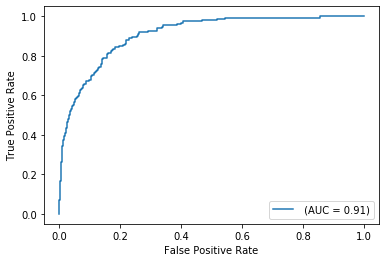

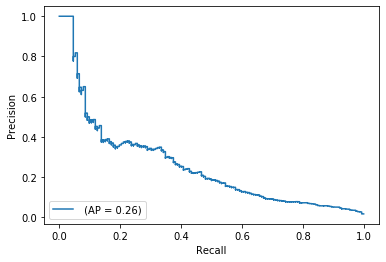

In [62]:
list_model = []
list_mean_proba_tacom = []
list_auc_score_tacom = []
list_recall_score_tacom = []
list_npv_score_tacom = []
list_mean_proba_tacom_with_ci = []
list_auc_score_tacom_with_ci = []
list_recall_score_tacom_with_ci = []



lower = 120
trX = train_df[train_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)].drop(columns = ['SURVIVAL_OUTCOME','GOOD_NEUROLOGIC_OUTCOME', 'CPR_DURATION_TIME']).values
trY = train_df[train_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)]['GOOD_NEUROLOGIC_OUTCOME'].values.flatten() * 1
teX = test_df[test_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)].drop(columns = ['SURVIVAL_OUTCOME','GOOD_NEUROLOGIC_OUTCOME', 'CPR_DURATION_TIME']).values
teY = test_df[test_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)]['GOOD_NEUROLOGIC_OUTCOME'].values.flatten() * 1

forest = lgb.LGBMClassifier(n_estimators=300, n_jobs=-1, max_depth=128, min_child_samples=60, num_leaves=64, subsample=0.8)
forest.fit(trX, trY)
    
proba = forest.predict_proba(teX)[:,1]
mean_proba = proba.mean()
fpr, tpr, _ = roc_curve(teY, proba)
auc_score = auc(fpr, tpr)
auprc_score = average_precision_score(teY, proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=auc_score,estimator_name='').plot()
    
prec, recall, _ = precision_recall_curve(teY, proba)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall,average_precision=auprc_score,estimator_name='').plot()
    

In [68]:
list_model = []
list_mean_proba_tacom = []
list_auc_score_tacom = []
list_recall_score_tacom = []
list_npv_score_tacom = []
list_mean_proba_tacom_with_ci = []
list_auc_score_tacom_with_ci = []
list_recall_score_tacom_with_ci = []


for lower in np.arange(0, 3660, 60):
    print(lower)
    trX = train_df[train_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)].drop(columns = ['SURVIVAL_OUTCOME','GOOD_NEUROLOGIC_OUTCOME', 'CPR_DURATION_TIME']).values
    trY = train_df[train_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)]['SURVIVAL_OUTCOME'].values.flatten() * 1
    teX = test_df[test_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)].drop(columns = ['SURVIVAL_OUTCOME','GOOD_NEUROLOGIC_OUTCOME', 'CPR_DURATION_TIME']).values
    teY = test_df[test_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)]['SURVIVAL_OUTCOME'].values.flatten() * 1
    
    #X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_sample(trX, trY)

    #XGBOOST
    forest = lgb.LGBMClassifier(n_estimators=300, n_jobs=-1, max_depth=128, min_child_samples=60, num_leaves=64, subsample=0.8)
    forest.fit(trX, trY)
    
    proba = forest.predict_proba(teX)[:,1]
    mean_proba = proba.mean()
    fpr, tpr, _ = roc_curve(teY, proba)
    auc_score = auc(fpr, tpr)
    
    thres_0001_pred = (proba >= 0.001)
    tn_001, fp_001, fn_001, tp_001 = confusion_matrix(teY, thres_0001_pred).ravel()
    
    list_mean_proba_tacom.append(mean_proba)
    list_auc_score_tacom.append(auc_score)
    list_recall_score_tacom.append(recall_score(teY, thres_0001_pred))
    list_npv_score_tacom.append(tn_001/(tn_001+fn_001))
    list_model.append(forest)
    


0
60
120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080
1140
1200
1260
1320
1380
1440
1500
1560
1620
1680
1740
1800
1860
1920
1980
2040
2100
2160
2220
2280
2340
2400
2460
2520
2580
2640
2700
2760
2820
2880
2940
3000
3060
3120
3180
3240
3300
3360
3420
3480
3540
3600


In [69]:
df_list_threshold_tamo = pd.DataFrame()

In [70]:
df_list_threshold_tamo['auc'] = list_auc_score_tacom
df_list_threshold_tamo['recall'] = list_recall_score_tacom
df_list_threshold_tamo['npv'] = list_npv_score_tacom

In [71]:
df_list_threshold_tamo.to_csv('tacom_threshold_metric_sur.csv',index=False)

In [213]:
train_df = df2[df2['YEAR'] != 2018]
test_df = df2[df2['YEAR'] == 2018]

In [210]:
test_df[test_df['CPR_DURATION_TIME'].apply(lambda x: lower <= x)]['SURVIVAL_OUTCOME'].loc[39730].flatten() * 1

array([1])